In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import json
import re
pd.options.mode.chained_assignment = None  # default='warn'

In [22]:
df = pd.read_csv("cleaned data/產量_臺灣鳳梨生產概況(2011~2019).csv")
df

,年度,地區別,果品類別,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
0,2019,新北市,鳳梨,72196,44500,2.61,1.65,1.00,26869.70,44.34
1,2019,台北市,鳳梨,0,0,0.00,0.00,0.00,0.00,0.00
2,2019,桃園市,鳳梨,2900,2280,0.10,0.08,1.18,33650.00,2.69
3,2019,台中市,鳳梨,5030287,4484837,145.14,129.24,1.37,47638.13,6156.75
4,2019,台南市,鳳梨,60682552,44679852,1761.48,1299.79,1.56,53561.26,69618.39
...,...,...,...,...,...,...,...,...,...,...
193,2011,基隆市,鳳梨,0,0,0.00,0.00,0.00,0.00,0.00
194,2011,新竹市,鳳梨,0,0,0.00,0.00,0.00,0.00,0.00
195,2011,嘉義市,鳳梨,2282398,2282398,65.23,65.23,1.10,38492.10,2510.84
196,2011,金門縣,鳳梨,0,0,0.00,0.00,0.00,0.00,0.00


### 選取欲使用欄位

In [23]:
cols = ['年度', '地區別', '果品類別', '種植面積_公頃', '收穫面積_公頃', '產量_公噸']
df_test = df[cols]

In [24]:
df_test.dtypes

年度           int64
地區別         object
果品類別        object
種植面積_公頃    float64
收穫面積_公頃    float64
產量_公噸      float64
dtype: object

### 輔助圖表(2011~2019變化)

#### 總產量趨勢圖

In [25]:
df.groupby("年度").sum().round(1)

,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
年度,,,,,,,
2011,332512794,304886520,9029.6,8263.8,17.3,597396.3,401367.0
2012,344905341,304273266,9334.9,8192.0,18.3,627472.0,392210.9
2013,362645551,321674857,9796.6,8657.7,18.1,627713.1,413465.3
2014,376681408,331966777,10154.0,8952.0,19.0,707234.0,456242.0
2015,389832014,351703822,10516.2,9472.1,21.1,714361.9,493998.4
2016,407735001,386362063,10973.8,10379.4,20.3,686211.7,527160.8
2017,420862601,386121573,11452.9,10490.6,19.9,665162.6,553530.8
2018,431114950,308566593,11793.0,8426.0,19.0,679522.0,432085.0
2019,425083210,300406482,11675.8,8239.0,23.1,751827.4,431084.1


In [26]:
x = np.arange(2011, 2020)
y = df.groupby("年度").sum()

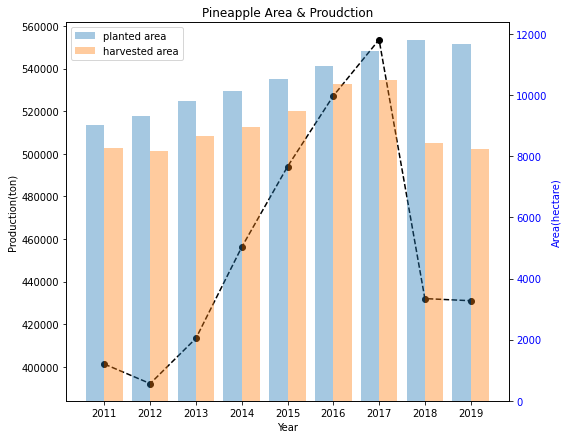

In [27]:
fig, ax1 = plt.subplots(figsize=(8,6))

width = 0.2
ax1.set_xticks(x)
ax1.plot(x, y["產量_公噸"], "--", marker="o", color="black")
ax1.set_xlabel("Year")
ax1.set_ylabel("Production(ton)", color="black")
ax1.tick_params(axis="y", labelcolor="black")

ax2 = ax1.twinx()
ax2.bar(x-width, y["種植面積_公頃"], width=0.4, alpha=0.4, label="planted area")
ax2.bar(x+width, y["收穫面積_公頃"], width=0.4, alpha=0.4, label="harvested area")
ax2.set_ylabel("Area(hectare)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

fig.tight_layout()
plt.title("Pineapple Area & Proudction")
plt.legend()
plt.savefig("Pineapple area & production.jpg", bbox_inches="tight")
plt.show()


In [28]:
df.dtypes

年度              int64
地區別            object
果品類別           object
種植株數            int64
收穫株數            int64
種植面積_公頃       float64
收穫面積_公頃       float64
每株平均產量_公斤     float64
每公頃平均產量_公斤    float64
產量_公噸         float64
dtype: object

### 取得2019年度全國鳳梨生產資料

In [29]:
data = df.loc[(df["年度"] == 2019)]
data

,年度,地區別,果品類別,種植株數,收穫株數,種植面積_公頃,收穫面積_公頃,每株平均產量_公斤,每公頃平均產量_公斤,產量_公噸
0,2019,新北市,鳳梨,72196,44500,2.61,1.65,1.00,26869.70,44.34
1,2019,台北市,鳳梨,0,0,0.00,0.00,0.00,0.00,0.00
2,2019,桃園市,鳳梨,2900,2280,0.10,0.08,1.18,33650.00,2.69
3,2019,台中市,鳳梨,5030287,4484837,145.14,129.24,1.37,47638.13,6156.75
4,2019,台南市,鳳梨,60682552,44679852,1761.48,1299.79,1.56,53561.26,69618.39
5,2019,高雄市,鳳梨,54331641,37955764,1509.28,1054.05,1.46,52500.97,55338.64
6,2019,宜蘭縣,鳳梨,1077950,781300,40.75,28.89,1.16,31453.55,908.69
7,2019,新竹縣,鳳梨,1400,800,0.07,0.04,1.00,20000.00,0.80
8,2019,苗栗縣,鳳梨,59402,59402,2.00,2.00,1.15,34229.00,68.46
9,2019,彰化縣,鳳梨,9047480,6145590,260.16,176.86,1.45,50283.52,8893.14


In [30]:
df_2019 = data[["地區別", "果品類別", "產量_公噸"]].sort_values(by="產量_公噸", ascending=False)

In [31]:
df_2019["地區別"] = df_2019["地區別"].str.replace("台", "臺")

In [32]:
df_2019.columns = ["COUNTYNAME","fruits", "production"]

In [33]:
df_2019.reset_index(drop=True, inplace=True)

In [34]:
df_2019

,COUNTYNAME,fruits,production
0,屏東縣,鳳梨,128277.12
1,臺南市,鳳梨,69618.39
2,嘉義縣,鳳梨,58129.38
3,高雄市,鳳梨,55338.64
4,南投縣,鳳梨,54101.38
5,雲林縣,鳳梨,26126.25
6,臺東縣,鳳梨,13345.64
7,彰化縣,鳳梨,8893.14
8,花蓮縣,鳳梨,7361.75
9,臺中市,鳳梨,6156.75


## 透過GeoPandas將上面的結果顯示於地圖

### 從政府資料開放平台取得台灣縣市行政圖的邊界&經緯度

[台灣縣市地圖](https://data.gov.tw/dataset/7441)

In [35]:
city_shp = gpd.read_file("geopandas use/mapdata202008310842/COUNTY_MOI_1090820.shp", encoding="utf-8")

In [36]:
city_shp

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry
0,Z,09007,連江縣,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ..."
1,G,10002,宜蘭縣,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ..."
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197..."
3,M,10008,南投縣,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236..."
4,P,10009,雲林縣,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ..."
5,C,10017,基隆市,Keelung City,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ..."
6,A,63000,臺北市,Taipei City,"POLYGON ((121.57098 25.19717, 121.57097 25.197..."
7,F,65000,新北市,New Taipei City,"POLYGON ((121.53752 25.30003, 121.53768 25.300..."
8,B,66000,臺中市,Taichung City,"POLYGON ((121.32834 24.43304, 121.32845 24.432..."
9,D,67000,臺南市,Tainan City,"POLYGON ((120.44025 23.41308, 120.44040 23.413..."


### 台灣地圖

(21.0, 26.0)

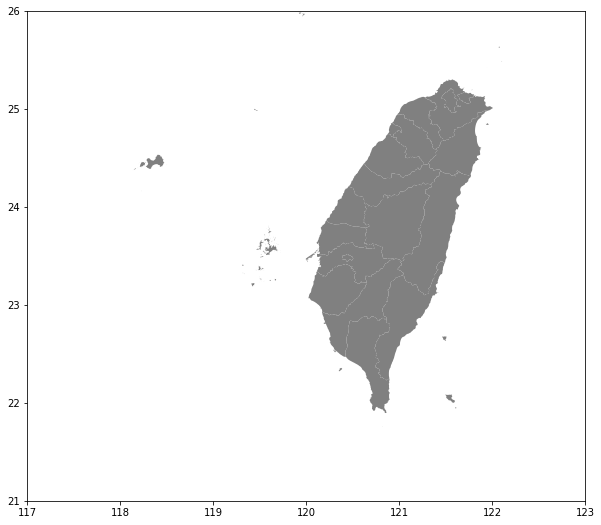

In [37]:
fig,ax = plt.subplots(figsize = (10, 10))
city_shp.plot(ax=ax, color="grey") #cmap="RdBu")

ax.set_xlim(117,123)
ax.set_ylim(21,26)

### 將df_2019pineapple資料與city_shp進行merge

In [38]:
whole_data = pd.merge(city_shp, df_2019, on="COUNTYNAME", how="left")

In [39]:
whole_data

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry,fruits,production
0,Z,09007,連江縣,Lienchiang County,"MULTIPOLYGON (((119.96445 25.94552, 119.96427 ...",鳳梨,0.00
1,G,10002,宜蘭縣,Yilan County,"MULTIPOLYGON (((121.95971 24.84494, 121.96064 ...",鳳梨,908.69
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.45655 24.20719, 120.48589 24.197...",鳳梨,8893.14
3,M,10008,南投縣,Nantou County,"POLYGON ((121.27086 24.23661, 121.27108 24.236...",鳳梨,54101.38
4,P,10009,雲林縣,Yunlin County,"MULTIPOLYGON (((120.08108 23.52412, 120.08161 ...",鳳梨,26126.25
5,C,10017,基隆市,Keelung City,"MULTIPOLYGON (((121.71015 25.17604, 121.71015 ...",鳳梨,0.75
6,A,63000,臺北市,Taipei City,"POLYGON ((121.57098 25.19717, 121.57097 25.197...",鳳梨,0.00
7,F,65000,新北市,New Taipei City,"POLYGON ((121.53752 25.30003, 121.53768 25.300...",鳳梨,44.34
8,B,66000,臺中市,Taichung City,"POLYGON ((121.32834 24.43304, 121.32845 24.432...",鳳梨,6156.75
9,D,67000,臺南市,Tainan City,"POLYGON ((120.44025 23.41308, 120.44040 23.413...",鳳梨,69618.39


### Visualize the result on map

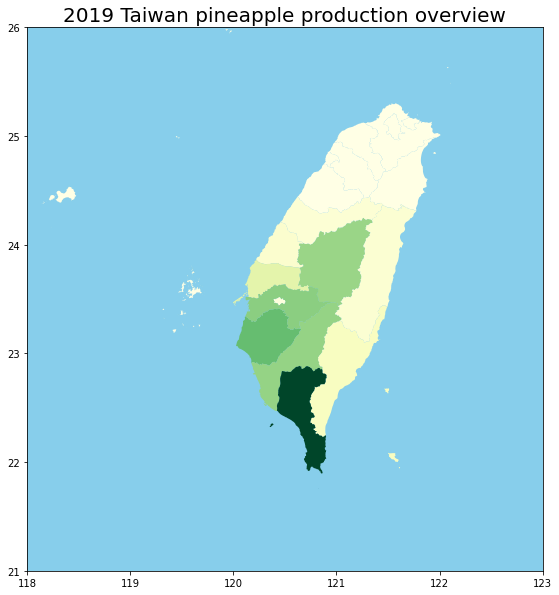

In [40]:
fig,ax = plt.subplots(figsize = (10, 10))
whole_data.plot(ax=ax, column="production", cmap="YlGn")

ax.set_xlim(118,123)
ax.set_ylim(21,26)
ax.set_title("2019 Taiwan pineapple production overview", size = 20)
ax.set_facecolor("skyblue")

### 後續問題
- 如何加上顏色條?
- 排行榜?